# Prodigy InfoTech Data Science Task 1
### -Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

# Importing all the necessary libraries for analysis

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

### In the primary dataframe csv file first 4 lines do not contain data and only mentions information related to data
### That leads to error in loading the data with pandas using pd.read_csv
### the dataframe starts from 5th line, therefore we have skipped 4 rows and "header= 0" indicates the 5th line to be considered header
### BUT ALSO WE CAN EDIT IT IN EXCEL . SO I FIRTS EDIT IT FOR BETTER UNDERSTANDING.

In [6]:
# LOAD DATSET
df= pd.read_csv('API_SP.POP.TOTL.FE.ZS_DS2_en_csv_v2_47972.csv')
metadata1= pd.read_csv('Metadata_Country_API_SP.POP.TOTL.FE.ZS_DS2_en_csv_v2_47972.csv')
metadata2 = pd.read_csv('Metadata_Indicator_API_SP.POP.TOTL.FE.ZS_DS2_en_csv_v2_47972.csv')

In [7]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,50.858849,50.850191,50.845065,50.836016,50.826773,50.823381,...,52.515590,52.589275,52.657475,52.723376,52.787792,52.849439,52.890182,52.873650,52.864860,NaN
1,Africa Eastern and Southern,AFE,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,50.387880,50.388814,50.391276,50.395656,50.400512,50.405510,...,50.559167,50.531940,50.518935,50.515859,50.504887,50.495993,50.486544,50.478916,50.472347,NaN
2,Afghanistan,AFG,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,48.083054,48.165001,48.242372,48.315893,48.385273,48.450285,...,49.432135,49.423184,49.414608,49.419284,49.437209,49.455485,49.470944,49.488405,49.508722,NaN
3,Africa Western and Central,AFW,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,50.179683,50.194408,50.203157,50.203679,50.204549,50.204173,...,49.807914,49.796591,49.783515,49.770292,49.758369,49.747269,49.738956,49.732453,49.725969,NaN
4,Angola,AGO,"Population, female (% of total population)",SP.POP.TOTL.FE.ZS,49.843790,49.700946,49.673797,49.634980,49.576791,49.488336,...,50.671632,50.657496,50.642098,50.625719,50.611615,50.598879,50.588558,50.580794,50.572443,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            265 non-null    float64
 5   1961            265 non-null    float64
 6   1962            265 non-null    float64
 7   1963            265 non-null    float64
 8   1964            265 non-null    float64
 9   1965            265 non-null    float64
 10  1966            265 non-null    float64
 11  1967            265 non-null    float64
 12  1968            265 non-null    float64
 13  1969            265 non-null    float64
 14  1970            265 non-null    float64
 15  1971            265 non-null    float64
 16  1972            265 non-null    float64
 17  1973            265 non-null    flo

In [9]:
# country meta data
metadata1.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [10]:
metadata1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  126 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.5+ KB


## Data Cleaning and Merging Dataframes to create a Consolidated Dataframe for EDA

In [11]:
merged_df = pd.merge(df, metadata1, on= 'Country Code', how='left')

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 73 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            265 non-null    float64
 5   1961            265 non-null    float64
 6   1962            265 non-null    float64
 7   1963            265 non-null    float64
 8   1964            265 non-null    float64
 9   1965            265 non-null    float64
 10  1966            265 non-null    float64
 11  1967            265 non-null    float64
 12  1968            265 non-null    float64
 13  1969            265 non-null    float64
 14  1970            265 non-null    float64
 15  1971            265 non-null    float64
 16  1972            265 non-null    float64
 17  1973            265 non-null    flo

In [13]:
pd.set_option('display.max_rows',None)
merged_df["Country Name"]

0                                                  Aruba
1                            Africa Eastern and Southern
2                                            Afghanistan
3                             Africa Western and Central
4                                                 Angola
5                                                Albania
6                                                Andorra
7                                             Arab World
8                                   United Arab Emirates
9                                              Argentina
10                                               Armenia
11                                        American Samoa
12                                   Antigua and Barbuda
13                                             Australia
14                                               Austria
15                                            Azerbaijan
16                                               Burundi
17                             

### EDA part

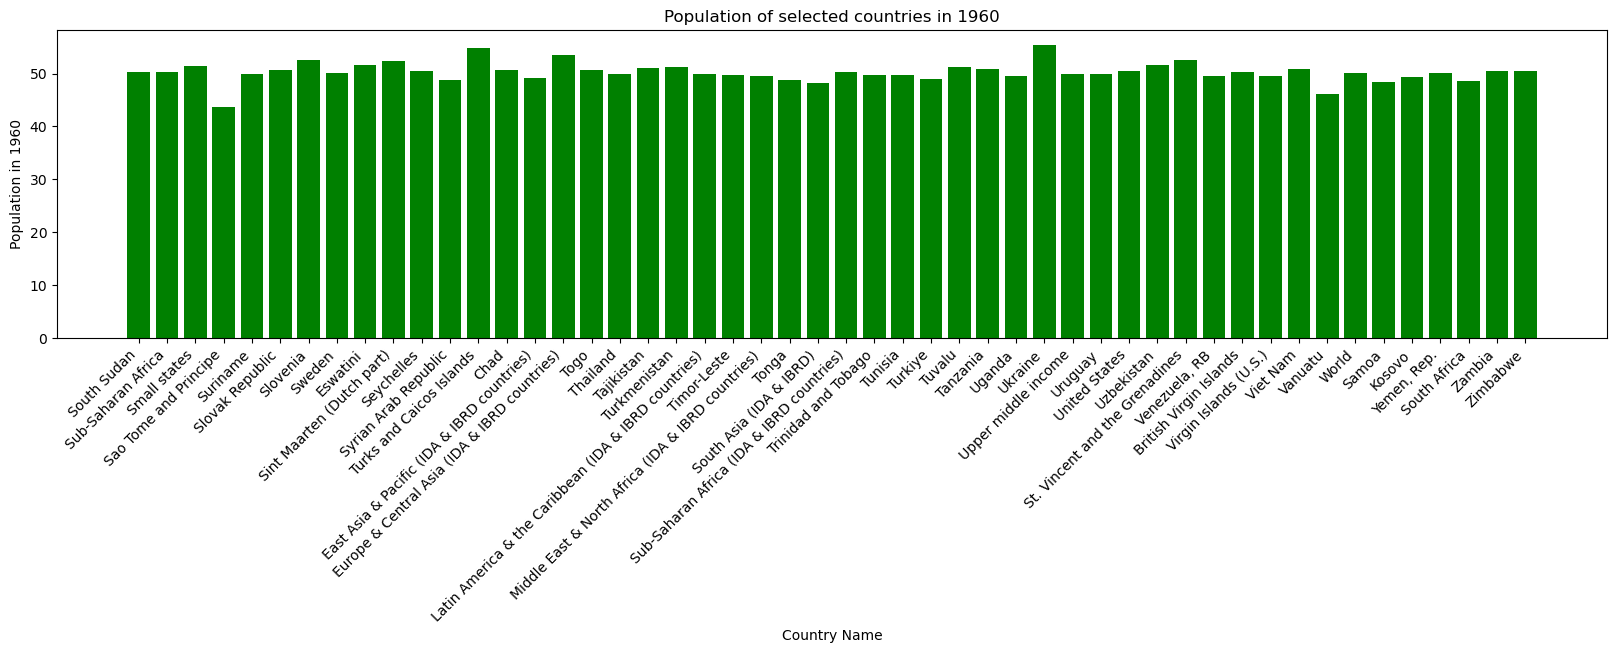

In [14]:
#Filtering the data frame
filtered_data = merged_df.tail(50)

#Creating the bar chart
color = ("green") 
fig = plt.figure(figsize =(20,4))
plt.bar (filtered_data['Country Name'], filtered_data['1960'],color=color)
plt.xlabel ('Country Name')
plt.ylabel ('Population in 1960')
plt.title('Population of selected countries in 1960')
plt.xticks(rotation=45, ha='right') #Rotating the x-axis labels for readability
plt.show()

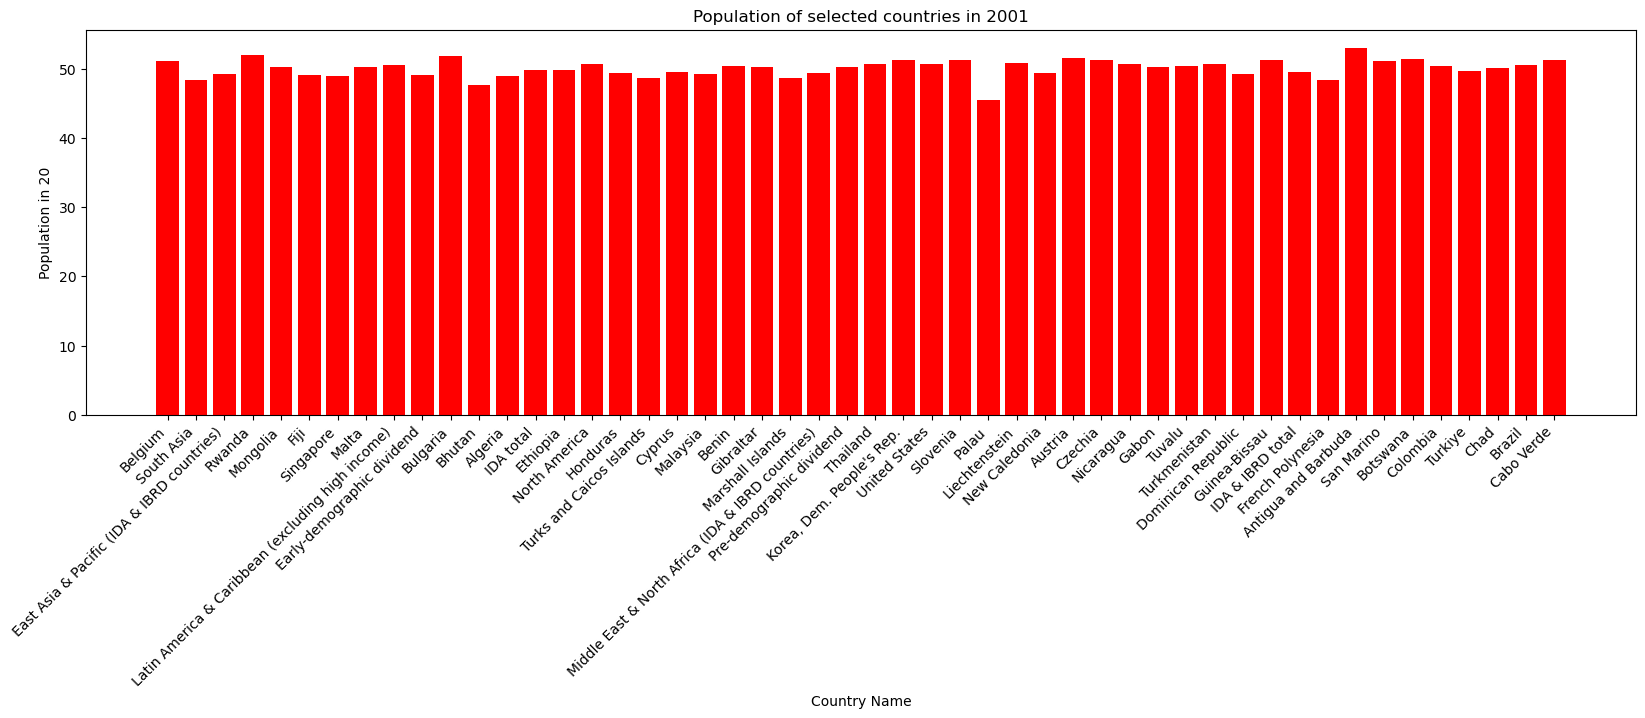

In [15]:
#Filtering the data frame
filtered_data = merged_df.sample(50)

#Creating the bar chart
color = ("red") 
fig = plt.figure(figsize =(20,5))
plt.bar (filtered_data['Country Name'], filtered_data['2001'],color=color)
plt.xlabel ('Country Name')
plt.ylabel ('Population in 20')
plt.title('Population of selected countries in 2001')
plt.xticks(rotation=45, ha='right') #Rotating the x-axis labels for readability
plt.show()

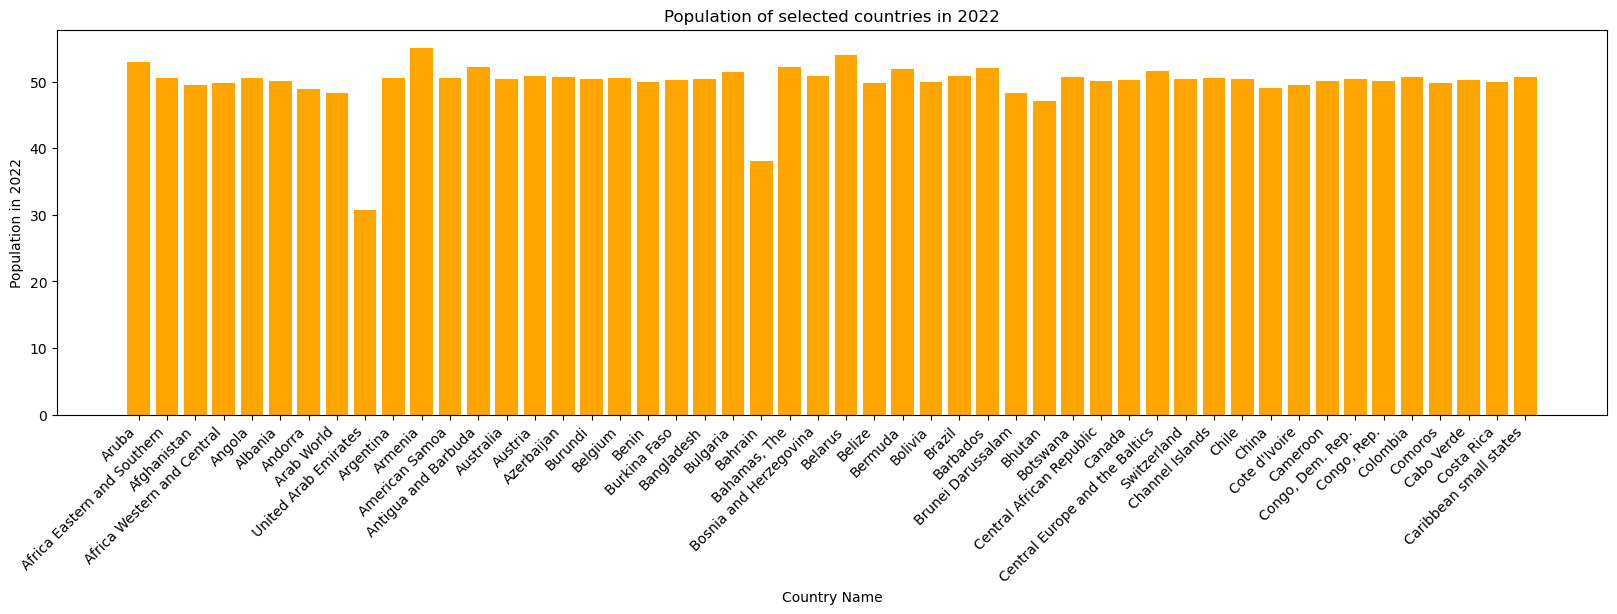

In [16]:
#Filtering the data frame
filtered_data = merged_df.head(50)

#Creating the bar chart
color = ("orange") 
fig = plt.figure(figsize =(20,5))
plt.bar (filtered_data['Country Name'], filtered_data['2022'],color=color)
plt.xlabel ('Country Name')
plt.ylabel ('Population in 2022')
plt.title('Population of selected countries in 2022')
plt.xticks(rotation=45, ha='right') #Rotating the x-axis labels for readability
plt.show()

# Thank You ...!